In [2]:
import os
import dotenv
from timezonefinder import TimezoneFinder
import matplotlib.pyplot as plt

In [3]:
dotenv.load_dotenv("../.env")

True

In [4]:
from power_dashboard.electricity_maps import get_electricity_maps_carbon_intensity, get_electricity_maps_zones, get_electricity_maps_power_breakdown


In [5]:
import googlemaps

gmaps = googlemaps.Client(key=os.getenv("GMAPS_API_KEY"))

# Geocoding an address
geocode_result = gmaps.geocode('134 Nahanton Ave, Milton, MA 02186')
lat = geocode_result[0]['geometry']['location']['lat']
lng = geocode_result[0]['geometry']['location']['lng']

In [6]:
geocode_result[0]['formatted_address']

'134 Nahanton Ave, Milton, MA 02186, USA'

In [7]:
result = get_electricity_maps_carbon_intensity(lat, lng)
result["zone"]

'US-NE-ISNE'

In [8]:
import pandas as pd
result_data = pd.DataFrame.from_records(result['history'])



In [15]:
tf = TimezoneFinder()
timezone_str = tf.timezone_at(lng=lng, lat=lat)
timezone_str

'America/New_York'

In [16]:
localized_time = pd.to_datetime(result_data['datetime']).dt.tz_convert(timezone_str)
localized_time

0    2024-08-08 10:00:00-04:00
1    2024-08-08 11:00:00-04:00
2    2024-08-08 12:00:00-04:00
3    2024-08-08 13:00:00-04:00
4    2024-08-08 14:00:00-04:00
5    2024-08-08 15:00:00-04:00
6    2024-08-08 16:00:00-04:00
7    2024-08-08 17:00:00-04:00
8    2024-08-08 18:00:00-04:00
9    2024-08-08 19:00:00-04:00
10   2024-08-08 20:00:00-04:00
11   2024-08-08 21:00:00-04:00
12   2024-08-08 22:00:00-04:00
13   2024-08-08 23:00:00-04:00
14   2024-08-09 00:00:00-04:00
15   2024-08-09 01:00:00-04:00
16   2024-08-09 02:00:00-04:00
17   2024-08-09 03:00:00-04:00
18   2024-08-09 04:00:00-04:00
19   2024-08-09 05:00:00-04:00
20   2024-08-09 06:00:00-04:00
21   2024-08-09 07:00:00-04:00
22   2024-08-09 08:00:00-04:00
23   2024-08-09 09:00:00-04:00
Name: datetime, dtype: datetime64[ns, America/New_York]

In [17]:
zones = get_electricity_maps_zones()
zones[result["zone"]]['zoneName']

'New England ISO'

In [18]:
average_carbon_intensity = result_data['carbonIntensity'].mean()

In [19]:
latest_time = localized_time.max()
latest_carbon_intensity = result_data.loc[localized_time == latest_time, "carbonIntensity"].values[0]
latest_carbon_intensity


335

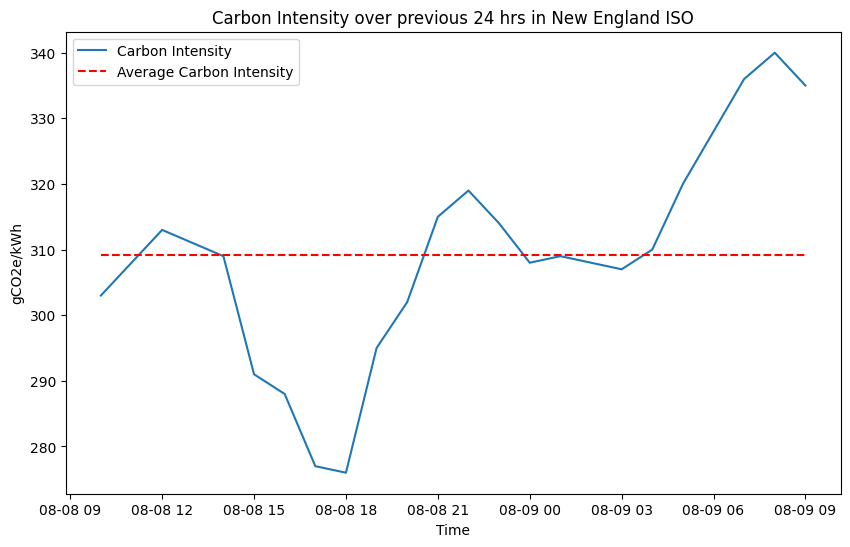

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(localized_time, result_data['carbonIntensity'], label='Carbon Intensity')
ax.hlines(average_carbon_intensity, localized_time.min(), localized_time.max(), label='Average Carbon Intensity', color='red', linestyle='--')
ax.legend()
ax.set_title(f"Carbon Intensity over previous 24 hrs in {zones[result['zone']]['zoneName']}")
ax.set_ylabel("gCO2e/kWh")
ax.set_xlabel("Time")
plt.show()

In [21]:
result = get_electricity_maps_power_breakdown(lat, lng)

In [24]:
# Calculate current hour of day
import datetime
# Format now() as date + hour
datetime.datetime.now().strftime('%Y-%m-%d %H')

'2024-08-09 09'

In [22]:
result

{'zone': 'US-NE-ISNE',
 'datetime': '2024-08-09T13:00:00.000Z',
 'updatedAt': '2024-08-09T12:49:39.204Z',
 'createdAt': '2024-08-06T14:03:16.949Z',
 'powerConsumptionBreakdown': {'nuclear': 3201,
  'geothermal': 0,
  'biomass': 557,
  'coal': 0,
  'wind': 423,
  'solar': 164,
  'hydro': 757,
  'gas': 8625,
  'oil': 0,
  'unknown': 0,
  'hydro discharge': 0,
  'battery discharge': 10},
 'powerProductionBreakdown': {'nuclear': 3293,
  'geothermal': None,
  'biomass': 569,
  'coal': None,
  'wind': 427,
  'solar': 169,
  'hydro': 620,
  'gas': 8874,
  'oil': None,
  'unknown': None,
  'hydro discharge': None,
  'battery discharge': 10},
 'powerImportBreakdown': {'CA-NB': 0, 'CA-QC': 188, 'US-NY-NYIS': 0},
 'powerExportBreakdown': {'CA-NB': 187, 'CA-QC': 0, 'US-NY-NYIS': 226},
 'fossilFreePercentage': 37,
 'renewablePercentage': 14,
 'powerConsumptionTotal': 13737,
 'powerProductionTotal': 13962,
 'powerImportTotal': 188,
 'powerExportTotal': 413,
 'isEstimated': True,
 'estimationMethod':

In [26]:
len(result['powerConsumptionBreakdown'].keys())

12